In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

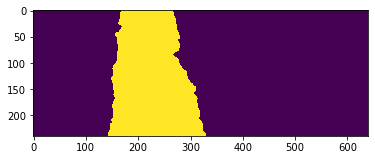

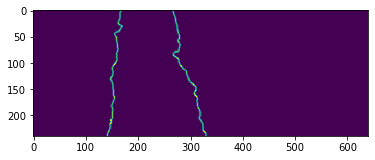

In [2]:
rgb = cv2.cvtColor(cv2.imread('data/img_00035.png'),cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(cv2.imread('data/img_00035.png'),cv2.COLOR_BGR2HSV)
hsv = cv2.GaussianBlur(hsv, (21,21), 0)


hsv = hsv[240:,:,:]

lower_blue = np.array([10, 80, 200])
upper_blue = np.array([40, 120, 250])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.imshow(mask)
plt.show()

edges = cv2.Canny(mask,200,100)
edges = cv2.GaussianBlur(edges, (5,5), 0)
plt.imshow(edges)

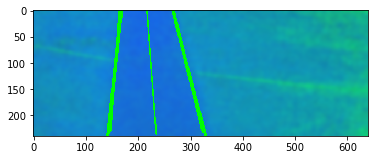

In [8]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,100, minLineLength=100, maxLineGap=100)
if lines is not None:
    
    for line in lines:
        x1,y1,x2,y2 = line[0]        
        hsv = cv2.line(hsv, (x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(hsv)
plt.show()

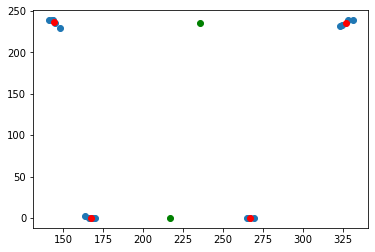

In [5]:
from sklearn.cluster import KMeans
lines = lines.reshape(-1,2)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(lines)

keypoints = np.asarray([kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]])

lower_mean = [np.mean(keypoints[0, keypoints[1] < 120]),np.mean(keypoints[1, keypoints[1] < 120])]
upper_mean = [np.mean(keypoints[0, keypoints[1] >= 120]),np.mean(keypoints[1, keypoints[1] >= 120])]

plt.plot(lines[:,0], lines[:,1], 'o')
plt.plot(keypoints[0,:], keypoints[1,:], 'o',c='red')
plt.plot(lower_mean[0], lower_mean[1], 'o',c='green')
plt.plot(upper_mean[0], upper_mean[1], 'o',c='green')
plt.show()


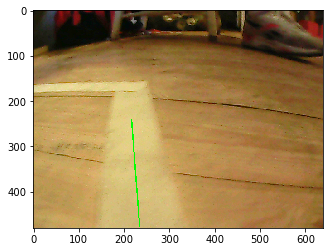

In [9]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,100, minLineLength=100, maxLineGap=100)
if lines is not None:
    
    for line in lines:
        x1,y1,x2,y2 = line[0]
        
        rgb = cv2.line(rgb, (int(lower_mean[0]),int(lower_mean[1])+240),(int(upper_mean[0]),int(upper_mean[1])+240),(0,255,0),2)
plt.imshow(rgb)
plt.show()